In [1]:
from itertools import chain
from matplotlib import cm
import matplotlib.pyplot as plt

# from cartopy.mpl.geoaxes import GeoAxes
import numpy as np
from obspy.signal.tf_misfit import plot_tfr
from lasif.exceptions import LASIFError
import cmasher as cmr
from typing import Union, List, Dict 
import cartopy.crs as ccrs
from glob import glob
import pandas as pd
import cartopy as cp
import toml
from tqdm import tqdm

In [ ]:
savepath = '/save/to/here.jpg'
dpi = 300

In [5]:
datalist = glob('./coordinate_info_global/*.toml')

station_events = []

for event in tqdm(datalist):
    d = toml.load(event)
    for j, rec in enumerate(d['receiver_coords']):
        station_events.append(({'longitude':d['src_lon'], 
                                 'latitude':d['src_lat']},
                               {'longitude':d['receiver_coords'][rec]['longitude'], 
                                'latitude':d['receiver_coords'][rec]['latitude']}))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2423/2423 [05:15<00:00,  7.67it/s]


In [ ]:
all_recs_lon = []
all_recs_lat = []
training_src_lon = []
training_src_lat = []
    
for entry in tqdm(station_events): 
    src, rec = entry
    all_recs_lon.append(rec['longitude'])
    all_recs_lat.append(rec['latitude'])
    training_src_lat.append(src['latitude'])
    training_src_lon.append(src['longitude'])

# Make sure that each dot is only plotted once
training_src = np.unique(np.array([training_src_lat, training_src_lon]).T, axis=0)
recs = np.unique(np.array([all_recs_lat, all_recs_lon]).T, axis=0)

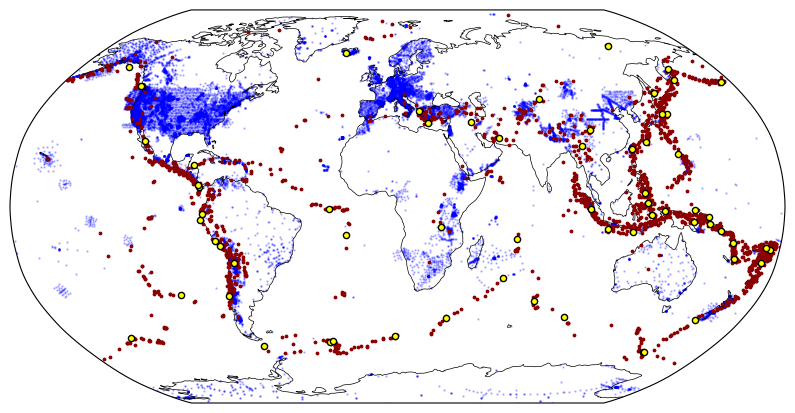

In [141]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=10))
ax.scatter(training_src[:,1], training_src[:,0], 3, c = 'darkred',transform=ccrs.PlateCarree(), zorder = 14)
ax.scatter(recs[:,1], recs[:,0], 0.5, c = 'b', alpha = 0.25,transform=ccrs.PlateCarree(), zorder = 12)
ax.add_feature(cp.feature.COASTLINE, lw=0.5, zorder = 13)
ax.set_global()

plt.savefig(savepath,  bbox_inches='tight', dpi=dpi)
plt.show()